In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ERG-131] Homework 4: Visualization
<br>

## Table of Contents
1 - [Project](#project)<br>
2 - [Plotting Basics](#basics)<br>
3 - [The Data](#data)<br>
4 - [Visual EDA - Histograms, KDEs, Box Plots, Violin Plots](#eda)<br>
5 - [Scatter Plots](#scatter)<br>


## Section 1: Project<a id='project'></a>

Before we dive into the nuts and bolts of visualization, we would like you to begin thinking about the final project. 

**Question 1.1** Write down (at least) two prediction questions that you are interested in exploring. These can be preliminary - it's ok (and expected) if your questions change and become more refined throughout the next few weeks, especially as you begin working with your team. Make it clear that you're posing prediction problems, not inference problems.  

*YOUR ANSWER HERE*


*For Section 1, students received full credit if they completed all parts of each question.*

**Question 1.2** You'll be building prediction models of the form $\hat{y}_i = \hat{f}(x_i)$.  For one of the two questions you listed in part 1.1, explain:
* What is $y$?  I.e. what is the specific quantity being measured in some places/times and predicted in others?  Note, this can be binary (0, 1) to support yes/no answers.  
* What would $i$ index?  I.e., what constitutes an observation?  Is it a point in space, a moment in time, a firm, an individual...?
* What are some candidate features to include in $x$?  
* Name (at least) two potential data sources you might use to explore your prediction questions. Insert a link to and a brief description of each dataset below. 

*YOUR ANSWER HERE*

**Question 1.3** What *resource allocation* problem would your prediction model serve?  That is, what would somebody do with the information your prediction model produces?

*YOUR ANSWER HERE*

**Question 1.4** Open, complete, and submit [this Google Form](https://forms.gle/riHTE2zcTaX2i2Hk7). Paste your answer from Question 1.1 where prompted. 

----

## Section 2: Plotting Basics <a id='basics'></a> 

So far we have learned how to use NumPy, Pandas, and Geopandas to manipulate and explore datasets. Now, we are going to learn how to use Python libraries matplotlib and seaborn to explore datasets visually.
In this homework, we will explore:
+ How to plot and customize graphs with matplotlib and seaborn
+ How to visualize distributions with histograms, kernel density estimators, box-and-whisker plots, and violin plots, and how to determine when to use which type of plot
+ How to create basic scatter plots
+ How to analyze and interpret plots
+ How to apply best practices when creating visualizations, including labeling titles, axes, legends, adjusting the font size, and choosing a color palette

### Dependencies

**Question 2.1** Import Pandas, NumPy, and matplotlib using their common pseudonyms. 

In [2]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Run the cell below to import a few other packages we'll use in this homework. Note the shorthand for the seaborn package.

In [3]:
import datetime
import os
import requests
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

Before we work with the data, we are going to go over some basic plotting basics using common mathematic functions. Take a look at the sample code below that plots a exponential curve.

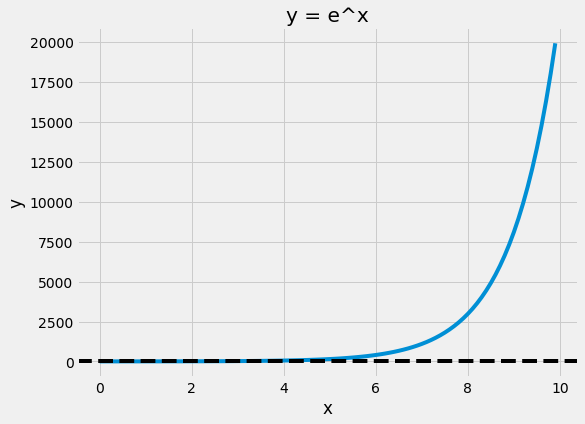

In [4]:
# Sample code to plot an exponential curve
x = np.arange(0, 10, 0.1) # This generates a set of numbers to plug into the function
y = np.exp(x) # Outputs y values from the exponential function
plt.figure(figsize=(8,6)) #a
plt.plot(x, y) #b
plt.ylabel("y") #c
plt.xlabel("x") #d
plt.title('y = e^x') #e
plt.axhline(y=0, color="k", linestyle='--') #f
plt.grid(True, which='both') #g
plt.show()

**Question 2.2:** Certain lines of codes are denoted by a comment, like "#a". Label what each commented line does, replacing the '...'. Feel free to modify the sample code to see what changes. You can also look up matplotlib.pyplot documentation [here](https://matplotlib.org/api/pyplot_summary.html): <br>
**a.** ... <br>
**b.** ... <br>
**c.** ... <br>
**d.** ... <br>
**e.** ... <br>
**f.** ... <br>
**g.** ... <br>

In [5]:
# POSSIBLE SOLUTION
# 1a. Changes plot size
# 1b. Plots y vs. x as lines (by default)
# 1c. Labels the y-axis 
# 1d. Labels the x-axis
# 1e. Adds a title to the plot
# 1f. Draws the a horizontal line on the x-axis
# 1g. Turns axis grids on

Next, run and observe the code below.

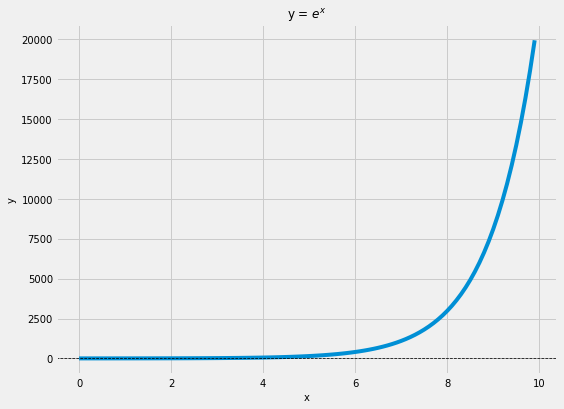

In [6]:
x = np.arange(0, 10, 0.1)
y = np.exp(x) 
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.title(r'y = $e^x$', fontsize=12) 
plt.xlabel("x", fontsize = 10) 
plt.ylabel("y", fontsize =10) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=0, color="k", linestyle='--', linewidth=0.75) 
plt.grid(True, which='both') 
plt.show()

**Question 2.3:** Name at least two differences between this plot and the first one. What are the differences, and where in the code are they produced? Which plot is better?

*Your answer here*<br>

*Possible answers:* 
- *The fontsizes for the title and axis labels are different. In the code, plt.title(), plt.xlabel(), and plt.ylabel() contain an additional argument, fontsize, which changes the font. Using the fontsize argument in an additional method, plt.xticks() and plt.yticks() changes the size of the text labeling the tick marks on the axes.*
- *In the title, a superscript is used in the second plot. This is achieved by using the syntax r'y = $...$' in plt.title() instead of 'y=e^x'.*
- *The horizontal line is thinner. A new argument, linewidth, in plt.axhline() changes the weight of the line.*

*The second plot is better because the title should be bigger than the axes labels and the title looks cleaner due to the use of the superscript. (Other answers accepted, but they needed to comment on which visual was preferable.)*

**Question 2.4:** In some cases, we want to create multiple subplots at once rather than in succession, especially if we want to compare the graphs side-by-side. Take a look at the code below. Replace the ellipses so that the exponential function, the natural logarithmic function, and the function 1/x are shown horizontally side-by-side. Make sure to change the appropriate arguments to [`plt.subplot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html), `y = `, and `plt.title()`. The first subplot has been completed for you.

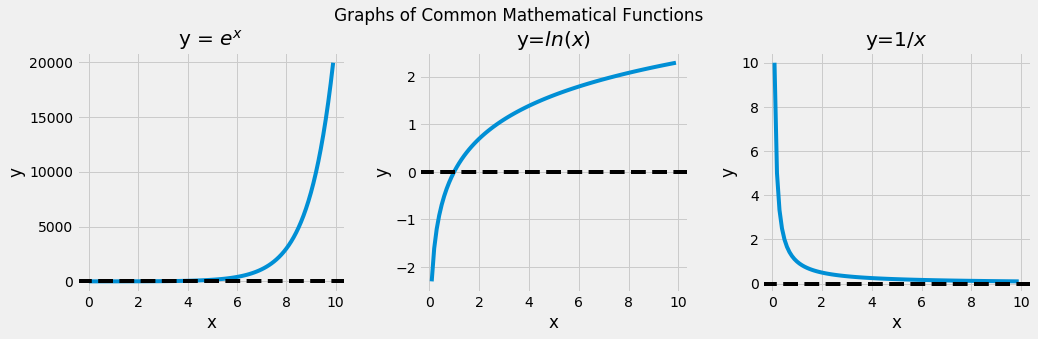

In [7]:
# solution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

x = np.arange(0, 10, 0.1)
y = np.exp(x)
plt.plot(x, y) 
plt.title(r'y = $e^x$') 
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k",linestyle = '--') 
plt.grid(True, which='both') 

plt.subplot(1, 3, 2) # YOUR CODE HERE

x = np.arange(0, 10, 0.1)
y = np.log(x) # YOUR CODE HERE; y = ln(x)
plt.plot(x, y) 
plt.title(r'y=$ln(x)$') # YOUR CODE HERE
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k",linestyle = '--') 
plt.grid(True, which='both') 

plt.subplot(1, 3, 3) # YOUR CODE HERE

x = np.arange(0, 10, 0.1)
y = np.divide(1,x) # YOUR CODE HERE; y = 1/x
plt.plot(x, y) 
plt.title(r'y=$1/x$') # YOUR CODE HERE
plt.xlabel("x") 
plt.ylabel("y") 
plt.axhline(y=0, color="k",linestyle = '--') 
plt.grid(True, which='both') 

plt.suptitle('Graphs of Common Mathematical Functions')

plt.tight_layout(pad = 2)

plt.show()

<br>

----
## Section 3: The Data<a id='data'></a>

In this notebook, you'll be revisiting data from the California Independent System Operator (CAISO) on renewable energy supply.<br>

For this assignment, we've downloaded data from CAISO's ["Today's Outlook" page](http://www.caiso.com/TodaysOutlook/Pages/default.aspx). You can take a look around the page and visit its different tabs to see how CAISO visualizes its daily data.<br>

To start off, we're going to make use of the function `CAISOrenewables()` that Duncan wrote for the `CAISO_data_pull.ipynb` file in lecture 2. The function is defined below.

In [8]:
def CAISOrenewables(year, month, start_day, end_day, production = False, matrix = False):
    """Scrape CAISO's daily renewable watch .txt files and 
    convert to a DataFrame or Numpy record array. Will only scrape
    a range of days in a given month.
    
    Keyword arguments:
    Year -- year of the date to scrape
    Month -- Month of date to scrape
    start_day -- starting day of month to scrape
    end_day -- ending day to scrape
    production -- If False, will collect hourly breakdown of renewable resources.
                  If True, will scrape hourly breakdown of total production by resource type.
    matrix -- If False, function will return a Pandas DataFrame
              If True, will return numpy recarray
    """
    base_url = 'http://content.caiso.com/green/renewrpt/'
    tail = '_DailyRenewablesWatch.txt'
    
    rv = pd.DataFrame()
    
    for day in range(start_day, end_day + 1):
        #format date and URL to pull
        if month < 10:
            str_month = '0' + str(month)
        else:
            str_month = str(month)
        if day < 10:
            str_day = '0'+ str(day)
        else:
            str_day = str(day)
            
        str_m_day = str_month + str_day
        url = base_url + str(year) + str_m_day + tail

        #Write scraped file to drive
        caiso_data = requests.get(url).text
        txt_filename = str(year) +str_m_day + '.txt'
        csv_filename = str(year) + str_m_day + '.csv'
    
        with open(txt_filename, 'w') as f:
            f.write(str(caiso_data))
    
        #Convert the .txt file to a csv.
        with open(txt_filename) as txtfile, open(csv_filename,'w') as new_csv:
            for line in txtfile: 
                new_csv.write(line.replace('\t',','))

        #Get day of year for dataframe index
        date = datetime.date(year, month, day)
    
        #Load data to dataframe.
        data = pd.read_csv(csv_filename, delimiter='\t')
        
        if not production:
            data = data.iloc[range(0, 25)]
        else:
            data = data.iloc[range(28, 53)].reset_index(drop=True)
    
        #Get column names
        columns = [i for i in np.array2string(data.iloc[0].values).split(',') if len(i)>3]
    
        #Grab first row of data to put in a dictionary then append the rest.
        first_row = [[int(i)] for i in np.array2string(data.iloc[1].values).split(',') if i.isdigit()]
        df_data = dict(zip(columns, first_row))
    
        #Do the same for the rest of the rows
        for row in range(2, data.shape[0]):
            vals = [int(i) for i in np.array2string(data.iloc[row].values).split(',') if i.isdigit()]
            for item in range(len(columns)):
                df_data[columns[item]].append(vals[item])
    
        #create DataFrame with collected data
        d_df = pd.DataFrame(df_data, [date]*24)[columns]
        rv = rv.append(d_df)
        
        os.remove(txt_filename)
        os.remove(csv_filename)
        
    if matrix:
        return rv.to_records(index=True)
    
    return rv

### Question 3.1
The function `CAISOrenewables()` can only pull data from start and end dates in the same month - for example, running:
```python
CAISOrenewables(2018,1,1,31)
```
will output all of the renewable energy generation data for the whole month of January 2018. We want to get data for the whole year rather than just one month. In the cell below, write code that loops through every month of the year 2018, gets all of the data for that month, and generates a dataframe `renewables_2018` that contains a record for every hour of every day of 2018 (24 x 365 = 8760, so `renewables_2018` should have 8760 rows).<br>

There are many ways to approach this, and you should use the method that's most intuitive to you. One approach would involve initializing an empty dataframe using `pd.DataFrame([])`, and then using `pd.concat()` to add data from each month.<br>

No matter what approach you take, it'll probably take a few minutes for your code to run, so you can try first writing a test loop for two months and then changing it to grab data for all the months once you're sure it works.

In [9]:
# solution - if you ended up using the CAISOrenewables() function, you can uncomment this and try it out

# Read in renewable generation data
renewables_2018 = pd.DataFrame([])
days = [31,28,31,30,31,30,31,31,30,31,30,31] # number of days in each month
for month in range(1,13): # loop through months
    renewables_2018 = pd.concat([renewables_2018, CAISOrenewables(2018,month,1,days[month-1])])

# alt. solution (half credit) - if you ended up reading the data from the file

# renewables_2018 = pd.read_csv("data/caiso_2018.csv", index_col = 0)
# renewables_2018.index = pd.to_datetime(renewables_2018.index)

In [10]:
renewables_2018.head()

,Hour,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL
2018-01-01,1,975,304,214,299,236,0,0
2018-01-01,2,976,304,215,301,277,0,0
2018-01-01,3,975,304,216,301,128,0,0
2018-01-01,4,974,303,215,301,82,0,0
2018-01-01,5,974,305,215,301,127,0,0


Run the cell below to add a "Month" column to the dataframe.

In [11]:
# Add a Month column to the df
renewables_2018['Month'] = pd.DatetimeIndex(renewables_2018.index).month

In [12]:
assert renewables_2018.shape == (8760, 9)

<br>

----

## Section 4: Visual EDA - Histograms, KDEs, Box Plots, Violin Plots <a id='eda'></a>

There are four different types of plots that are commonly used to visualize the distribution of data: histograms, kernel density estimator (KDE) plots, box-and-whisker plots, and violin plots. We're going to plot all four types and discuss the differences between them. <br>

We'll start by looking specifically at wind energy generation.

### Histograms

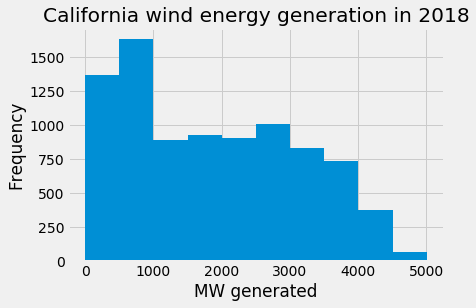

In [13]:
# Run this cell to plot a histogram of wind energy generation in 2018
plt.hist(renewables_2018["WIND TOTAL"])
plt.title("California wind energy generation in 2018")
plt.ylabel("Frequency")
plt.xlabel("MW generated")
plt.show()

### Question 4.1.1

Qualitatively describe what the height of each bar in the histogram represents.

*YOUR ANSWER HERE*

*The height of a bar represents the number of hours in 2018 that wind energy generation was within a certain range (e.g., 0-500MW for the first bar, 501-1000 for the second bar...)*

### Question 4.1.2
Our histogram isn't super informative. It might be more interesting to look at how the distribution of wind energy generation changes over the course of the year.<br>

In the empty cell below, create a plot with 12 subplots.  Each subplot should show the histogram distribution for each of the 12 months of the year. Add x-axis and y-axis labels and a title to each subplot.<br>

One approach to this question would involve initializing the figure area with `plt.figure()`, and then looping through the months to add histogram subplots using `plt.subplot()`. Your final figure might look a little cramped - you can use `plt.tight_layout()` at the end to avoid any overlapping subplots.

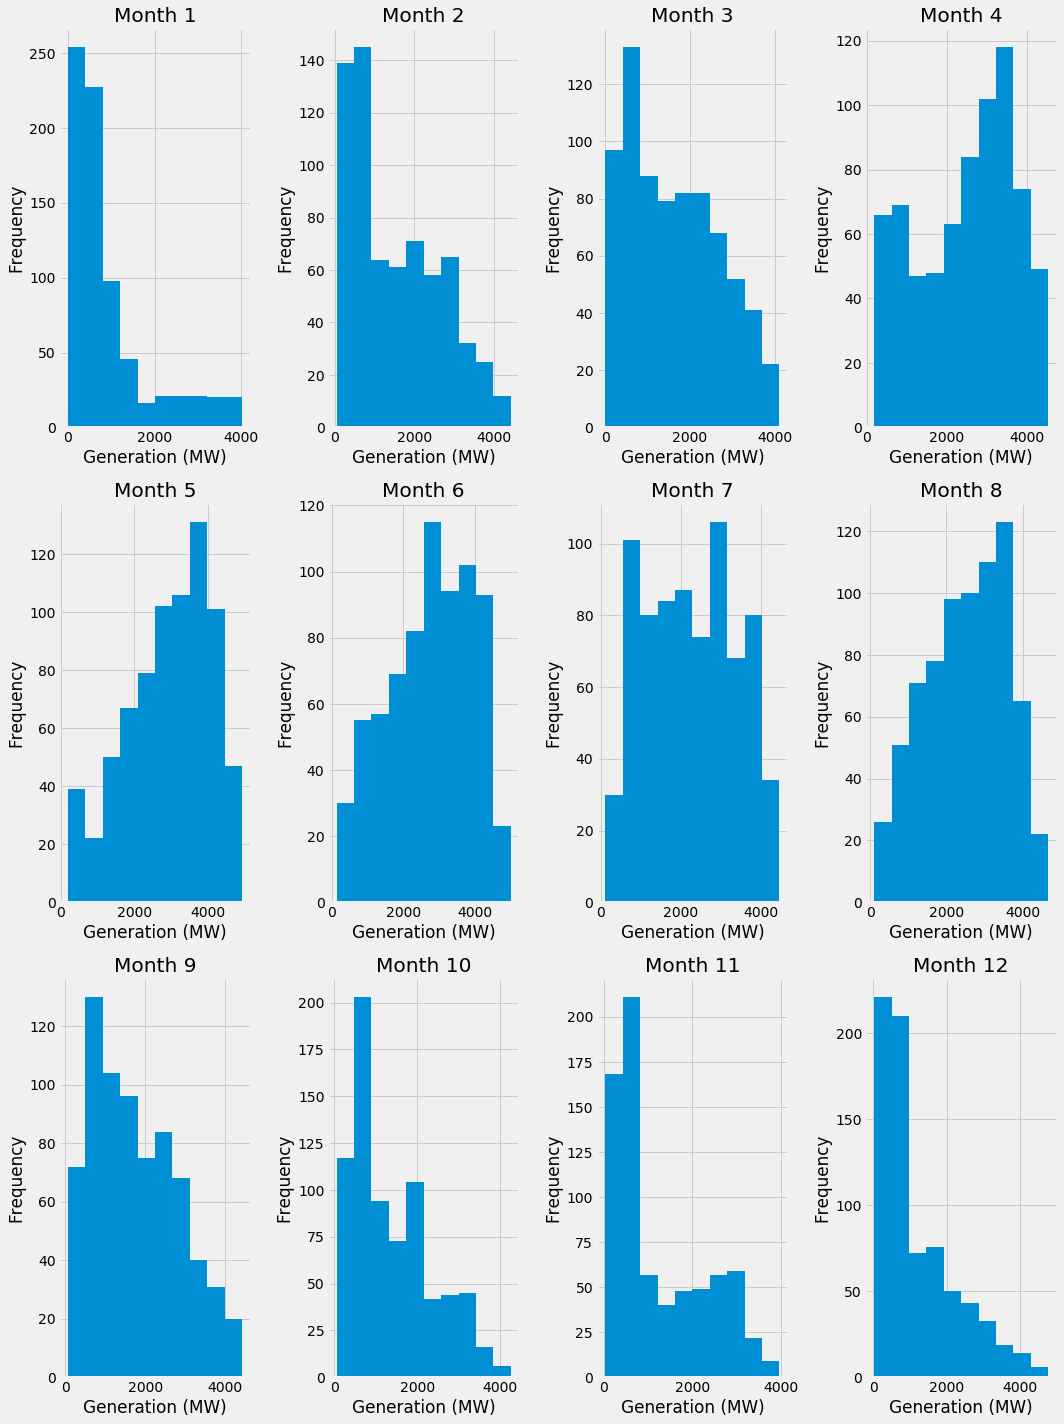

In [14]:
# YOUR CODE HERE

# Skeleton
# plt.figure(figsize=(...))

# for i in range(...):
#     plt.subplot(...)
#     plt.hist(...)
#     plt.title(...)
#     plt.xlabel(...)
#     plt.ylabel(...)

# plt.tight_layout()
# plt.show()

plt.figure(figsize=(15, 20))

for i in range(1,13):
    plt.subplot(3, 4, i)
    plt.hist(renewables_2018[renewables_2018["Month"] == i]["WIND TOTAL"])
    plt.title("Month " + str(i))
    plt.xlabel("Generation (MW)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Question 4.1.3
What can you observe from the histograms?  Provide at least three observations that contrast the plots.

*Your answer here*

In [15]:
# Possible answers 
# 1. the highest production levels are most likely to be reached in April and May.
# 2. December and January have a significant fraction of hours in the lowest bin. 
# 3. The summer months (May through August) are the ones in which the production is most close to uniformly distributed.

### Question 4.1.4
Unless you are ahead of the curve and already coded this into your plots, you probably have histograms that have different x and y axis scales. Re-enter your code to generate the plots below, but this time call `plt.xlim()` and `plt.ylim()` in your for loop to give all the plots the same axis scales.

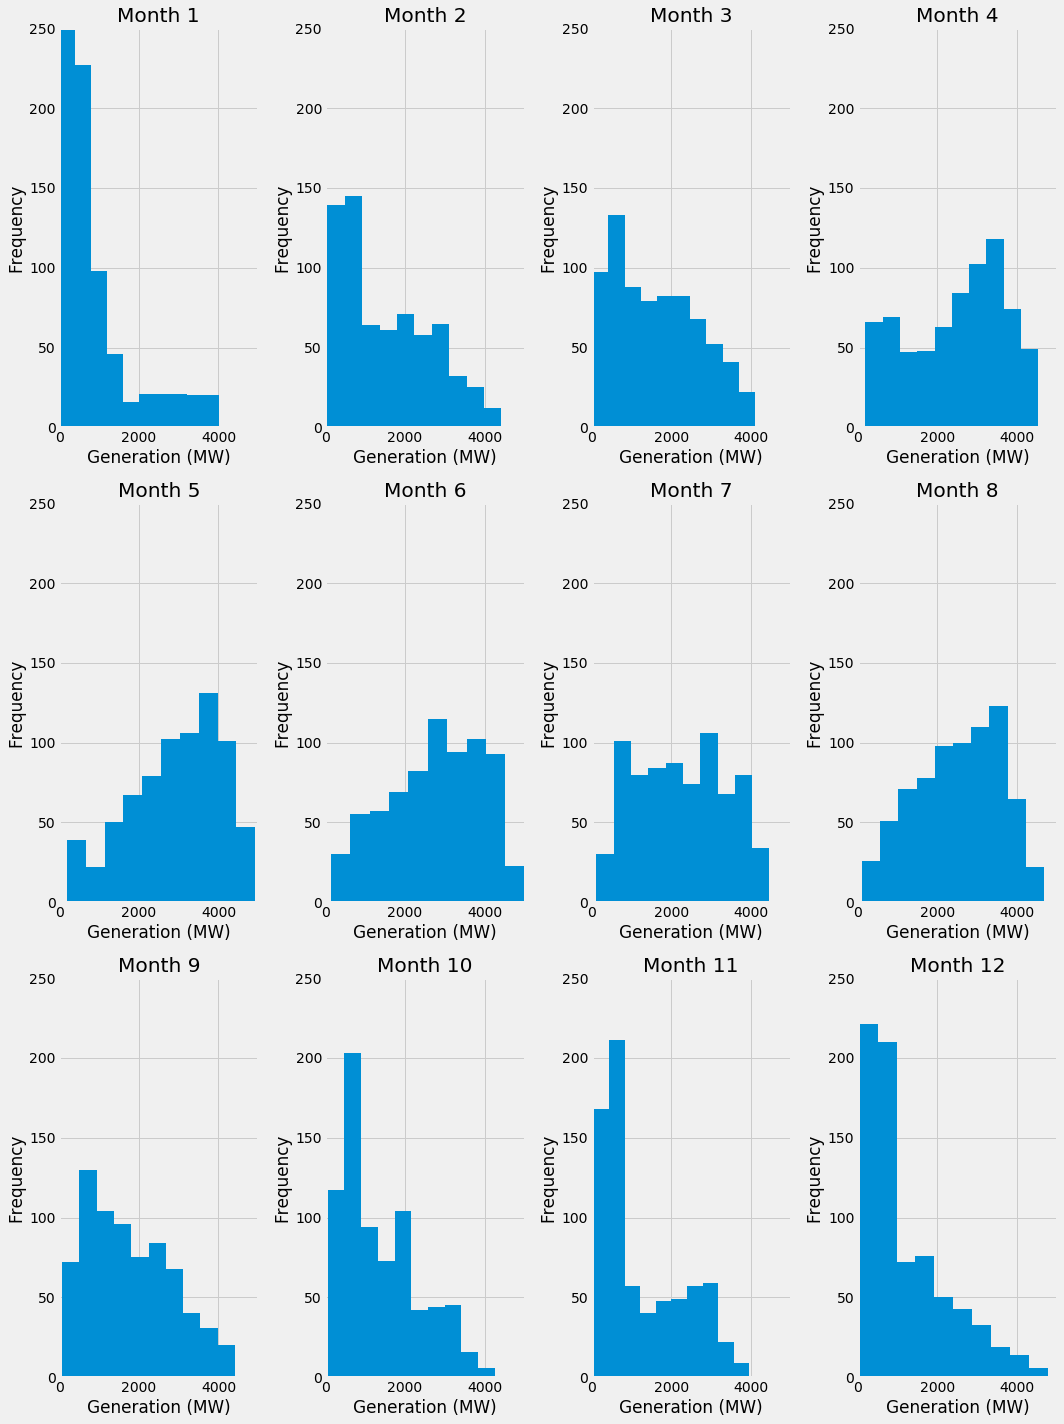

In [16]:
# YOUR CODE HERE

plt.figure(figsize=(15, 20))

for i in range(1,13):
    plt.subplot(3, 4, i)
    plt.hist(renewables_2018[renewables_2018["Month"] == i]["WIND TOTAL"])
    plt.title("Month " + str(i))
    plt.xlabel("Generation (MW)")
    plt.ylabel("Frequency")
    plt.xlim(0,5000)
    plt.ylim(0,250)

plt.tight_layout()
plt.show()

### Question 4.1.5
Do you notice anything new when you re-scale the axes? Do the trends shown over the different months make sense to you?  Provide two additional observations that are more noticeable here than in the prior plots.

*Your answer here*

In [17]:
# Possible answers
# 1. The winter months are much more likely to have low- or no-generation hours than are the other seasons. Perhaps wind turbines are turned off due to icing?
# 2. August might be the windiest month in the sense that it shows the fewest hours when the wind generation is zero or below 1000 MW. 

### Seaborn and KDEs
**Seaborn** is a Python data visualization library that is built on top of matplotlib. It offers a higher level of abstraction, and arguably more attractive-looking graphics.<br>

Below is a histogram plotted using seaborn. Because of its higher level of abstraction, seaborn can plot elements on a graph that would usually require extra calculation using our usual libraries (e.g., a linear regression line; or the kernel density estimation curve overlayed on the top of this histogram). A great option for plotting a univariate distribution of observations is seaborn [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html), which combines matplotlib histogram with seaborn kde and rugplot. 

Note that the KDE plot normalizes the data so that it is between 0 and 1. It also represents the distribution of a set of data, with [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother).

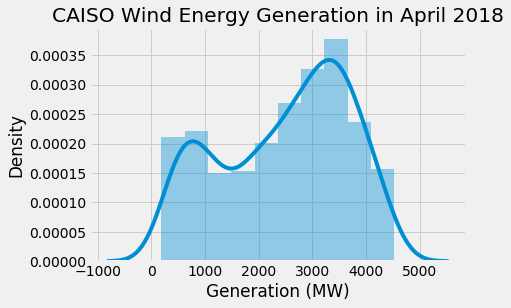

In [18]:
# Run this example seaborn plot
sns.distplot(renewables_2018.loc[renewables_2018['Month']==4]["WIND TOTAL"])
plt.title("CAISO Wind Energy Generation in April 2018")
plt.xlabel("Generation (MW)")
plt.ylabel("Density")
plt.show()

### Question 4.2.1

The plot above gives us the histogram and KDEs for the month of April, but as we know from earlier in the homework assignment, there's quite a bit of variation from month to month. Use sns.distplot() to plot only the KDEs (not the histograms) of wind energy generation for each month. You should end up with 12 different curves (one for each onth) all on the same plot.

Make sure to include a legend, title, and axis labels. Consult the [documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html) if necessary.<br>

A for loop will be helpful here again - as with previous problems, you may want to use `plt.figure()` to establish your figure area, and then call `sns.distplot()` within a for loop.  

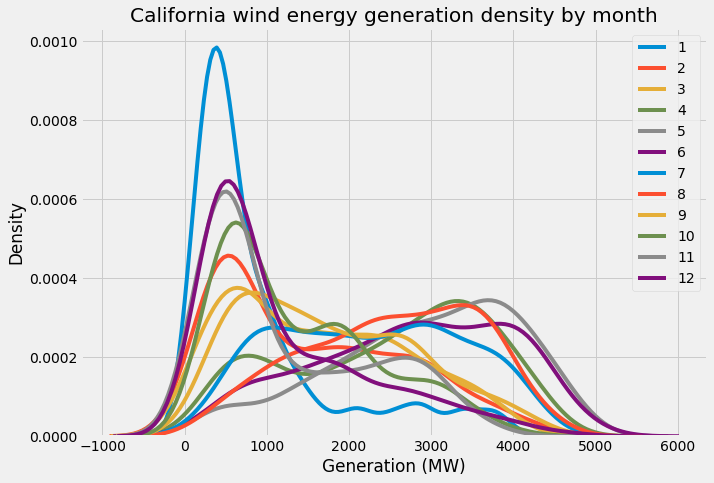

In [19]:
# YOUR CODE HERE

#Skeleton
# plt.figure(...)

# for i in range(...):
#     sns.distplot(...)

# plt.legend()
# plt.title(...)
# plt.xlabel(...)
# plt.ylabel(...)
# plt.show()

plt.figure(figsize=(10, 7))

for i in range(1,13):
    sns.distplot(renewables_2018[renewables_2018["Month"] == i]["WIND TOTAL"], 
                 hist=False, kde=True, label=i)

plt.legend()
plt.title("California wind energy generation density by month")
plt.xlabel("Generation (MW)")
plt.ylabel("Density");

### Question 4.2.2

Several of the distributions have negative values on the left side of the support.  That's clearly not physical -- the data are all non-negative.  Why is this happening?  What could you do to reduce the problem?

*Your answer here*

*Possible answer: the kernel is not constrained to positive values of the support.  So even though the data all sit in the positive part of the support, the kernels themselves can take on non-zero values in negative parts of the support. One could address the problem by reducing the bandwidth.*

### Question 4.2.3
Do you observe anything new from this visualization that wasn't apparent when you looked at the histograms? How can this visualization be made better, or more informative?

*Your answer here*

*Full marks given if students answer both questions (if they observe something new, and how the visualization can be improved).*

The default color palette that seaborn used for our kernel density plot is a little confusing - it's hard to keep track of 12 different lines on one graph, especially since some of the colors are used more than once! One thing we can do to make the plot more digestible is to use a sequential color palette, so that each month is plotted as a different shade of the same color.<br>

One way to get a sequential color palette in Python is to use the [`sns.cubehelix_palette()`](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html) function. The output of this function is an array of RGB values, each of which represents a different color on a sequential spectrum. If you run the code below, you'll get an array of 6 lists, each of which contains the RGB values for a different color. You can also try to modify the default arguments, like `start = `, that are outlined in the function documentation. If you run the second cell below, you can preview your color palette using `sns.palplot()`.<br>

In [20]:
# run this cell to generate a color palette and save the RGB values to test_palette
test_palette = sns.cubehelix_palette(6)
test_palette

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592],
 [0.8559578605899612, 0.6418993116910497, 0.6754191211563135],
 [0.739734329496642, 0.4765280683170713, 0.5959617419736206],
 [0.57916573903086, 0.33934576125314425, 0.5219003947563425],
 [0.37894937987024996, 0.2224702044652721, 0.41140014301575434],
 [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]

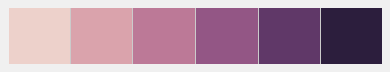

In [21]:
# run this cell to preview the colors in the palette you just defined, test_palette
sns.palplot(test_palette)

### Question 4.2.4
In the empty code cell block below, define a palette using `sns.cubehelix_palette()` that contains a number of colors equal to the number of lines that you'll be plotting, and then modify your code for generating the KDE plots so that the color of your hour lines get lighter as the months increase. The result should be a plot with 12 KDE curves, each plotted in a different shade of the same color. To achieve this, you'll want to use the `color = ` argument within `sns.distplot()`.

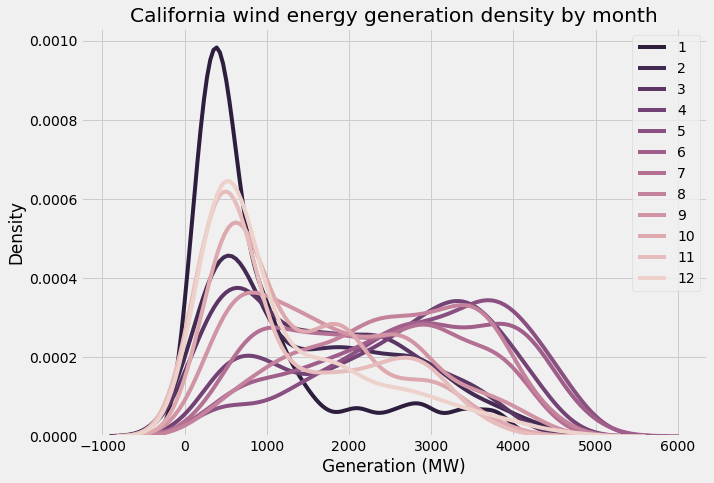

In [22]:
# YOUR CODE HERE
plt.figure(figsize=(10, 7))

palette = sns.cubehelix_palette(12)

for i in range(1,13):
    sns.distplot(renewables_2018[renewables_2018["Month"] == i]["WIND TOTAL"], 
                 hist=False, kde=True, label=i, color = palette[12-i])

plt.legend()
plt.title("California wind energy generation density by month")
plt.xlabel("Generation (MW)")
plt.ylabel("Density");

### Question 4.2.5
Do you observe anything new from your latest KDE plot, with multiple hours and a sequential color palette, that wasn't as obvious from the histograms or the first KDE plot?

*Your answer here*

### Question 4.2.6

Why would it be advantageous to only plot the KDE instead of the histogram?

*Your answer here*

*Possible answers: can layer multiple plots; can better capture continuity of data since it isn't binned*

### Box Plots and Violin Plots

### Question 4.3.1

Back to matplotlib! Using the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) for plt.boxplot(), plot the distribution of hourly generation in 2018 for biomass, biogas, geothermal, small hydro, solar PV, solar thermal, and wind energy side by side. Make sure to add a title and label axes.<br>

*Hint*: if you want to input multiple columns of a Pandas dataframe to `plt.boxplot()`, you can use the syntax `plt.boxplot(df[["Column 1", "Column 2"]].values)`.<br>

*Note*: in the lab, we used the sns boxplot function; now we're trying the matplotlib one. The syntax, especially when it comes to labelling axes, is a little bit different, but the documentation, previous examples, and the skeleton code below will guide you through labelling boxplots in matplotlib.

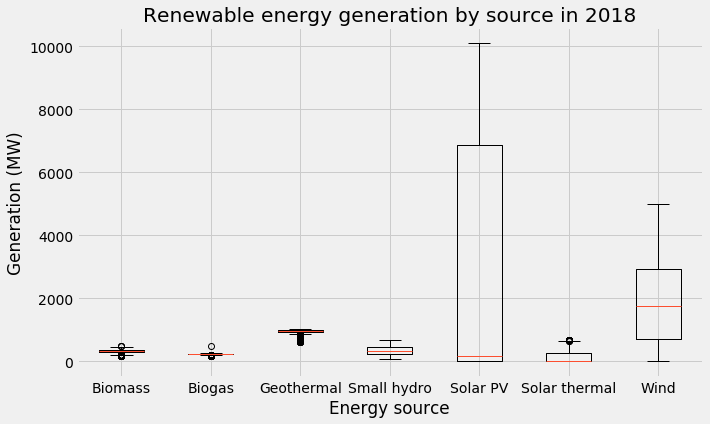

In [23]:
# YOUR CODE HERE

# SKELETON
# fig = plt.figure(1, figsize=(9, 6))
# ax = fig.add_subplot(111)
# plt.boxplot(...)
# ax.set_xticklabels(...)
# plt.xlabel(...)
# plt.ylabel(...)
# plt.title(...)
# plt.show()

fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111)
plt.boxplot(renewables_2018[["BIOMASS", 'BIOGAS', 'GEOTHERMAL', 'SMALL HYDRO', "SOLAR PV", "SOLAR THERMAL", "WIND TOTAL"]].values)
ax.set_xticklabels(["Biomass", 'Biogas','Geothermal','Small hydro',"Solar PV", "Solar thermal", "Wind"])
plt.xlabel("Energy source")
plt.ylabel("Generation (MW)")
plt.title("Renewable energy generation by source in 2018")
plt.show()

### Question 4.3.2
What can you observe from the box plot above?

*Your answer here*

One thing we notice from our box plot is that the different energy sources generate energy at completely different scales, since there are different installed capacities (and capacity factors) of each resource. To get a better sense of distribution, we can try normalizing against the installed capacity of each energy source (capacity is a MW value that tells us the maximum amount of each resource that is available). That is, instead of plotting the distribution of geothermal generation, we can plot the distribution of the ratio of geothermal generation to its installed capacity in California, and we can do the same for the other resources.<br>

According to [CAISO](http://www.caiso.com/informed/Pages/CleanGrid/default.aspx), the installed capacity for biofuels is 856 MW, geothermal energy is 1,526 MW; for small hydro is 1,274 MW; for solar is 13,383 MW; and for wind is 6,977 MW. (These values are for 2020, so the normalized values you calculate below won't be quite accurate for 2018.)<br>

### Question 4.3.3
To match the CAISO installed capacity categories, add two new summary columns to `renewables_2018`: a `Biofuels` column that sums generation from biomass and biogas for each hour, and a `Solar` column that sums generation from solar PV and solar thermal for each hour.

In [24]:
# YOUR CODE HERE
renewables_2018['Biofuels'] = renewables_2018['BIOMASS'] + renewables_2018['BIOGAS']
renewables_2018['Solar'] = renewables_2018['SOLAR PV'] + renewables_2018['SOLAR THERMAL']
renewables_2018.head()

,Hour,GEOTHERMAL,BIOMASS,BIOGAS,SMALL HYDRO,WIND TOTAL,SOLAR PV,SOLAR THERMAL,Month,Biofuels,Solar
2018-01-01,1,975,304,214,299,236,0,0,1,518,0
2018-01-01,2,976,304,215,301,277,0,0,1,519,0
2018-01-01,3,975,304,216,301,128,0,0,1,520,0
2018-01-01,4,974,303,215,301,82,0,0,1,518,0
2018-01-01,5,974,305,215,301,127,0,0,1,520,0


### Question 4.3.4
Using the code from the boxplot above as a starting point, plot the energy generation values for biofuels, geothermal, small hydro, solar, and wind energy, normalized to their respective installed capacities. This is a rough estimate of the ratio of the total capacity that is being utilized, i.e., the capacity factor.

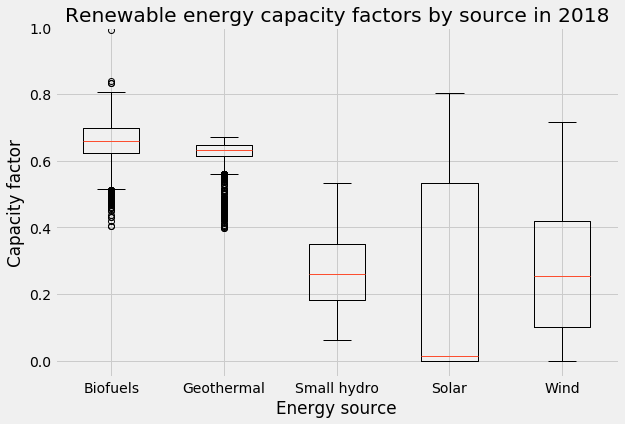

In [25]:
# YOUR CODE HERE
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.boxplot(renewables_2018[['Biofuels', 'GEOTHERMAL', 'SMALL HYDRO', 'Solar', 'WIND TOTAL']].values/
            [856,1526,1274,13383,6977])
ax.set_xticklabels(["Biofuels", 'Geothermal','Small hydro',"Solar", "Wind"]);
plt.xlabel("Energy source")
plt.ylabel("Capacity factor")
plt.ylim(top = 1)
plt.title("Renewable energy capacity factors by source in 2018")
plt.show()

### Question 4.3.5
What new insights does the normalized box plot provide?

*Your answer here*

### Question 4.4.1
Now, using the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.violinplot.html) for `plt.violinplot()`, plot the energy generation for biofuels, geothermal, small hydro, solar, and wind energy, normalized by capacity, side by side. The syntax for axis labeling in this section is very similar to that used with plt.boxplot(). <br>

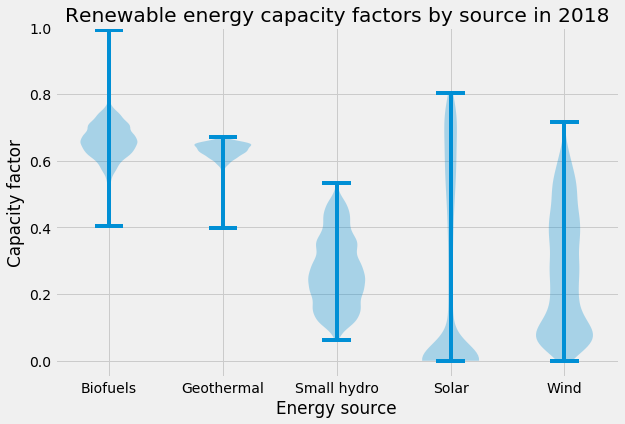

In [26]:
#YOUR COdE HERE

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.violinplot(renewables_2018[['Biofuels', 'GEOTHERMAL', 'SMALL HYDRO', 'Solar', 'WIND TOTAL']].values/
            [856,1526,1274,13383,6977])
ax.set_xticklabels(['','Biofuels', 'Geothermal','Small hydro',"Solar", "Wind"]);
plt.xlabel("Energy source")
plt.ylabel("Capacity factor")
plt.ylim(top = 1)
plt.title("Renewable energy capacity factors by source in 2018")
plt.show()

### Question 4.4.2
Look closely at the violin plot for solar. Can you think of an explanation for its shape, in particular, why a substantial portion of the distribution falls near zero?

*Your answer here*

*The solar violin plot has a somewhat bimodal distribution. The high distribution of values near 0 reflects the fact that solar generators produce electricity only during the day. There will be many hours after sunset when solar energy resources produce close to zero output.*

### Question 4.5
Compare and contrast the four different types of plots above (histograms, KDE plots, box plots and violin plots), discussing the pros and cons of each of them. What can you see in one type of plot that you can't see in the others? In what situations would use you use one type of plot over another?

*YOUR ANSWER HERE* 

*Example answers:* 
- Histogram: easy to see skewness, though perhaps not as easily as a KDE. 
- KDE: great way to get an understanding of probability density at a glance, but can be skewed by outliers, and can look very different depending on parameters
- Box Plot: easy to see median/IQR/outliers, but information is lost within boxplot, etc.
- Violin Plot: great combination of box/prob dens, but skewed by outliers.

<br>

---

## Section 5: Scatter Plots<a id='scatter'></a>

In this section, we will look at renewable energy generation trends over time using scatter plots.<br>

### Question 5.1
Create a scatter plot that shows the date on the x-axis, and the total renewable energy generation (i.e. the sum of generation values at each time period for each energy source) on the y-axis.Make sure to label the title and axes, and make sure the y-axis starts at 0. You can find the documentation for plt.scatter() [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). You can also play around with the marker colour and size to get a plot that looks better than the default layout. 

*Hint*: use `df.index` to get the date values from the index, and the method `.sum(axis=1)` to get the sum of each row.

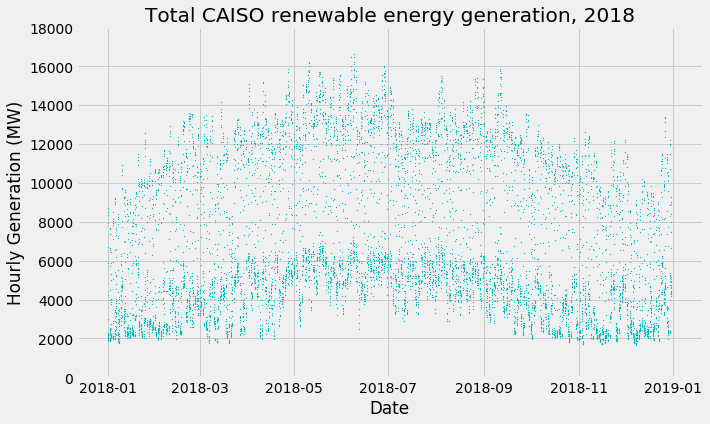

In [27]:
# solution
plt.figure(figsize = (10,6))
plt.scatter(renewables_2018.index, renewables_2018.iloc[:,1:8].sum(axis=1), s = 0.5, color = 'c')
plt.title("Total CAISO renewable energy generation, 2018")
plt.xlabel("Date")
plt.ylabel("Hourly Generation (MW)")
plt.ylim(0,18000)
plt.show()

### Question 5.2
In this section, you get to plot a scatter plot of your choice using this assignment's renewable energy generation data. The only restrictions are that your plot should show at least two different series (e.g. two different columns of data).<br>

If you want an idea of where to get started, you can try plotting generation values for different resources as a function of date, or thinking of different ways to summarize the generation data (e.g., you could find daily generation means).<br>

As always, make sure to add a title and axis labels, and set the y- and x-axis range to values that make sense for the plot. You should also choose an appropriate color scheme and other design elements (like marker size or shape).<br>

In the markdown cell below, provide a 1-3 sentence justification of your choice of data and design elements. What are you trying to convey, and how did you format your plot to convey that message?

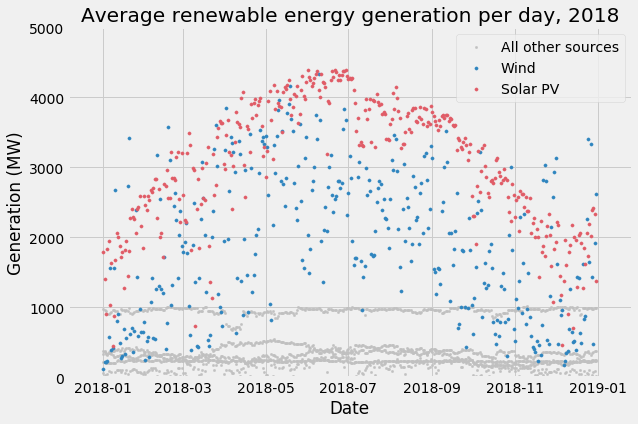

In [28]:
# one possible approach
means = renewables_2018.groupby(renewables_2018.index).mean()

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

for i in range(1,8):
    color = 'silver'
    label = None
    size = 5
    if means.columns[i] == "SOLAR PV":
        color = '#E05C67'
        label = 'Solar PV'
        size = 10
    elif means.columns[i] == "WIND TOTAL":
        color = '#2F85BF'
        label = 'Wind'
        size = 10
    elif means.columns[i] == "GEOTHERMAL":
        label = 'All other sources'
    ax.scatter(means.index, means.iloc[:,i], s = size, label = label, color = color)
    
plt.title("Average renewable energy generation per day, 2018")
plt.xlabel("Date")
plt.ylabel("Generation (MW)")
plt.ylim(0,5000)
plt.legend()
plt.show()

*YOUR ANSWER HERE*

*Example: When I plotted the data with a different colour for each source, I found that only wind and solar PV really varied with time and were also driving the trend in increasing renewable generation in the summer. I decided to highlight those two resources so that their trend in generation was apparent, and grey out all other renewable sources.*

----

## Submission

Congrats, you're done with homework 4!

Before you submit, click **Kernel** --> **Restart & Clear Output**. Then, click **Cell** --> **Run All**. Then, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file **as both an .html and .ipynb file through bCourses**.

----

## Bibilography
+ CAISO - Renewables Reporting Data. http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx
+ Seaborn - Distplot. https://seaborn.pydata.org/generated/seaborn.distplot.html
+ Matplotlib. https://matplotlib.org
+ Knowledge Stockpile - Creating boxplots with Matplotlib. http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

<hr/>
Notebook developed by: Rebekah Tang

Data Science Modules: http://data.berkeley.edu/education/modules